# Tutoriel d'usage de l'API

In [ ]:
import urllib.parse

domain = "51.91.251.0"
port = 3000
host = f"http://{domain}:{port}"
path = lambda x: urllib.parse.urljoin(host, x)

## Creating an avatar

The admin of the competition can create users. A user can then create as many avatars as they wish.

In [ ]:
import requests

In [ ]:
import requests

user_id = 'f525dab6-57f5-4f5e-bc0f-4ef7002ae54f'


647


In [ ]:
name = 'seryana-first-avatar'
r = requests.post(path(f'avatars/{user_id}/{name}'))
r

<Response [409]>

In [ ]:
name = 'seryana-second-avatar'
r = requests.post(path(f"avatars/{user_id}/{name}"))
r

<Response [409]>

In [ ]:
r = requests.get(path(f"avatars/{user_id}"))
for avatar in r.json():
    print(avatar['id'], avatar['name'])

35124 seryana-first-avatar
35526 yasser-first-avatar
69578 seryana-second-avatar
125454 seryana-0
125455 seryana-1
125456 seryana-2
125457 seryana-3
125458 seryana-4
125459 seryana-5


## Making pricing requests

In [ ]:
params = {
    "avatar_name": "seryana-first-avatar",
    "language": "hungarian",
    "city": "copenhagen",
    "date": 7,
    "mobile": 0,
}
r1 = requests.get(path(f"pricing/{user_id}"), params=params)
r1.json()

{'detail': 'A pricing request for this avatar already exists for a sooner date'}

In [ ]:
params = {
    "avatar_name": "seryana-first-avatar",
    "language": "hungarian",
    "city": "copenhagen",
    "date": 6,
    "mobile": 1,
}
r2 = requests.get(path(f"pricing/{user_id}"), params=params)
r2.json()

{'prices': [{'hotel_id': 99, 'price': 212, 'stock': 0},
  {'hotel_id': 523, 'price': 109, 'stock': 4},
  {'hotel_id': 401, 'price': 206, 'stock': 5},
  {'hotel_id': 481, 'price': 100, 'stock': 0},
  {'hotel_id': 422, 'price': 505, 'stock': 6},
  {'hotel_id': 435, 'price': 488, 'stock': 6},
  {'hotel_id': 463, 'price': 102, 'stock': 0},
  {'hotel_id': 142, 'price': 409, 'stock': 11},
  {'hotel_id': 96, 'price': 164, 'stock': 3},
  {'hotel_id': 309, 'price': 99, 'stock': 0},
  {'hotel_id': 539, 'price': 368, 'stock': 11},
  {'hotel_id': 58, 'price': 338, 'stock': 4},
  {'hotel_id': 959, 'price': 232, 'stock': 9},
  {'hotel_id': 90, 'price': 210, 'stock': 6},
  {'hotel_id': 995, 'price': 224, 'stock': 8},
  {'hotel_id': 425, 'price': 323, 'stock': 4},
  {'hotel_id': 50, 'price': 156, 'stock': 4},
  {'hotel_id': 249, 'price': 92, 'stock': 0},
  {'hotel_id': 202, 'price': 208, 'stock': 6},
  {'hotel_id': 698, 'price': 242, 'stock': 9},
  {'hotel_id': 508, 'price': 284, 'stock': 5},
  {'hote

In [ ]:
params = {
    "avatar_name": "seryana-second-avatar",
    "language": "french",
    "city": "paris",
    "date": 10,
    "mobile": 0,
}
r3 = requests.get(path(f"pricing/{user_id}"), params=params)
r3.json()

{'prices': [{'hotel_id': 731, 'price': 194, 'stock': 0},
  {'hotel_id': 584, 'price': 477, 'stock': 10},
  {'hotel_id': 937, 'price': 232, 'stock': 7},
  {'hotel_id': 254, 'price': 170, 'stock': 0},
  {'hotel_id': 782, 'price': 299, 'stock': 22},
  {'hotel_id': 734, 'price': 146, 'stock': 1},
  {'hotel_id': 467, 'price': 264, 'stock': 61},
  {'hotel_id': 436, 'price': 255, 'stock': 56},
  {'hotel_id': 748, 'price': 214, 'stock': 13},
  {'hotel_id': 790, 'price': 469, 'stock': 10},
  {'hotel_id': 159, 'price': 262, 'stock': 8},
  {'hotel_id': 165, 'price': 166, 'stock': 17},
  {'hotel_id': 612, 'price': 234, 'stock': 13},
  {'hotel_id': 188, 'price': 88, 'stock': 13},
  {'hotel_id': 24, 'price': 344, 'stock': 17},
  {'hotel_id': 392, 'price': 196, 'stock': 4},
  {'hotel_id': 419, 'price': 140, 'stock': 8},
  {'hotel_id': 342, 'price': 124, 'stock': 1},
  {'hotel_id': 56, 'price': 255, 'stock': 12},
  {'hotel_id': 970, 'price': 340, 'stock': 19},
  {'hotel_id': 911, 'price': 158, 'stock'

In [ ]:
t = requests.get(path(f"remaining-requests/{user_id}"))
t.json()

992

## Build a training set

In [ ]:
import pandas as pd

pricing_requests = []

requests = [r1,r2,r3]
for r in requests:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

KeyError: ignored

In [ ]:
len(pricing_requests)

443

In [ ]:
from google.colab import files

import io

uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
hotels = pd.read_csv(io.BytesIO(uploaded['features_hotels.csv']), index_col=['hotel_id', 'city'])
#hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
pricing_requests = pricing_requests.join(hotels, on=['hotel_id', 'city'])
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,695,212,6,copenhagen,7,hungarian,0,35124,Yin Yang,Ardisson,1,0,0
1,506,155,2,copenhagen,7,hungarian,0,35124,Independant,Independant,1,0,0
2,562,343,5,copenhagen,7,hungarian,0,35124,Chillton Worldwide,Quadrupletree,0,0,0
3,547,212,7,copenhagen,7,hungarian,0,35124,Yin Yang,Ardisson,1,0,0
4,92,88,8,copenhagen,7,hungarian,0,35124,Independant,Independant,0,0,0


In [ ]:
len(pricing_requests)

443

In [ ]:
#hotels = pd.read_csv('features_hotels.csv', index_col=['hotel_id', 'city'])
#pricing_requests = pricing_requests.join(hotels, on=['hotel_id', 'city'])
#pricing_requests.head()

In [ ]:
sample_submission = pd.read_csv('../input/defi-ia-2023/sample_submission.csv')
sample_submission.head()

In [ ]:
sample_submission.to_csv('submission.csv', index=False)

NameError: ignored

In [ ]:
import random
import pandas as pd

In [ ]:
random.randint(0,1)

1

In [ ]:
import random
list_city = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna' , 'vilnius']
list_language = [ 'austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch', 'estonian', 'finnish', 'french', 'german', 'greek',
                 'hungarian', 'irish', 'italian', 'latvian',
                 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian', 'slovakian', 'slovene', 'spanish' , 'swedish']
list_date=[180,120,90,60,50,30,15,10,1,5,7]
list_avatar=[]
list_requests=[]
c=0
for i in range(500):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  avatar = 'final-'+str(c)
  requests.post(path(f"avatars/{user_id}/{avatar}"))
  list_avatar.append(avatar)
  params= {
    "avatar_name": avatar,
    "language": random.choice(list_language),
    "city": random.choice(list_city),
    "date": random.choice(list_date),
    "mobile": random.randint(0,1),
  }
  list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
  c = c + 1 

In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()


,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,143,60,112,sofia,180,finnish,0,351160
1,270,95,196,sofia,180,finnish,0,351160
2,815,136,279,sofia,180,finnish,0,351160
3,923,43,111,sofia,180,finnish,0,351160
4,597,138,283,sofia,180,finnish,0,351160


In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
  if r.status_code==200:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

ValueError: ignored

In [ ]:
pricing_requests.to_csv("dataset_500_1.csv")

In [ ]:
list_date_ordonnee=[45,40,35,30,26,25,24,23,22,21,20,18,17,16,15,14,13,10,9,8,7,6,5,4,3,2,1]
for j in range(len(list_date_ordonnee)):
  print(list_date_ordonnee[j])

45
40
35
30
26
25
24
23
22
21
20
18
17
16
15
14
13
10
9
8
7
6
5
4
3
2
1


### **AUTRE APPROCHE**

In [ ]:
import random
list_city = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna' , 'vilnius']
list_language = [ 'austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch', 'estonian', 'finnish', 'french', 'german', 'greek',
                 'hungarian', 'irish', 'italian', 'latvian',
                 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian', 'slovakian', 'slovene', 'spanish' , 'swedish']
list_date_ordonnee=[180,120,90,60,50,30,15,10,5,1]
list_avatar=[]
list_requests=[]
c=501
for i in range(50):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  avatar = 'final-'+str(c)
  requests.post(path(f"avatars/{user_id}/{avatar}"))
  list_avatar.append(avatar)
  for j in range(len(list_date_ordonnee)):
    params= {
      "avatar_name": avatar,
      "language": random.choice(list_language),
      "city": random.choice(list_city),
      "date": list_date_ordonnee[j],
      "mobile": random.randint(0,1),
    }
    list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
  c = c + 1 

In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,583,65,56,rome,180,irish,0,351660
1,932,122,112,rome,180,irish,0,351660
2,843,206,281,rome,180,irish,0,351660
3,51,124,140,rome,180,irish,0,351660
4,260,94,139,rome,180,irish,0,351660


In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
  if r.status_code==200:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,19,52,56,vilnius,60,austrian,1,314273
1,288,105,139,vilnius,60,austrian,1,314273
2,820,124,195,vilnius,60,austrian,1,314273
3,654,121,194,vilnius,60,austrian,1,314273
4,125,53,56,vilnius,60,austrian,1,314273


In [ ]:
pricing_requests.to_csv("dataset_500_2.csv")

In [ ]:
list_requests.to_csv("requests.csv")

AttributeError: ignored

**PREDICTION**

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()
hotels = pd.read_csv(io.BytesIO(uploaded['features_hotels.csv']), index_col=['hotel_id', 'city'])

Saving features_hotels.csv to features_hotels.csv
Saving sample_submission.csv to sample_submission.csv
Saving test_set.csv to test_set.csv


In [ ]:
sample = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
test_set = pd.read_csv(io.BytesIO(uploaded['test_set.csv']))

In [ ]:
test_set.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving dataset_1.csv to dataset_1.csv
Saving dataset_2.csv to dataset_2.csv
Saving dataset_3.csv to dataset_3.csv
Saving dataset_4.csv to dataset_4.csv
Saving dataset_5.csv to dataset_5.csv
Saving dataset_6.csv to dataset_6.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['dataset_1.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['dataset_2.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['dataset_3.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['dataset_4.csv']))
df5 = pd.read_csv(io.BytesIO(uploaded['dataset_5.csv']))
df6 = pd.read_csv(io.BytesIO(uploaded['dataset_6.csv']))

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [ ]:
df.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,967,83,0,amsterdam,5,austrian,1,125454
1,1,588,184,0,amsterdam,5,austrian,1,125454
2,2,317,214,6,amsterdam,5,austrian,1,125454
3,3,387,439,5,amsterdam,5,austrian,1,125454
4,4,660,182,1,amsterdam,5,austrian,1,125454


In [ ]:
df_final = df.join(hotels, on=['hotel_id', 'city'])
df_final.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,967,83,0,amsterdam,5,austrian,1,125454,Independant,Independant,1,0,0
1,1,588,184,0,amsterdam,5,austrian,1,125454,Independant,Independant,0,0,0
2,2,317,214,6,amsterdam,5,austrian,1,125454,Accar Hotels,Marcure,0,0,0
3,3,387,439,5,amsterdam,5,austrian,1,125454,Accar Hotels,Safitel,1,0,0
4,4,660,182,1,amsterdam,5,austrian,1,125454,Chillton Worldwide,Tripletree,0,0,0


In [ ]:
df_final['Unnamed: 0']

0         0
1         1
2         2
3         3
4         4
       ... 
8094    111
8095    112
8096    113
8097    114
8098    115
Name: Unnamed: 0, Length: 103955, dtype: int64

In [ ]:
test_set_joined = test_set.join(hotels, on=['hotel_id', 'city'])
test_set_joined.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
y = df_final['price']
X = df_final.drop(['Unnamed: 0','price'], axis=1)
rf = RandomForestRegressor()
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
X_dummies = pd.get_dummies(X)
rf.fit(X_dummies,y)

RandomForestRegressor()

In [ ]:
X_test_dummies = pd.get_dummies(X_test)
y_pred = rf.predict(X_test_dummies)
y_pred = pd.Series(y_pred)

In [ ]:
index = test_set_joined['index']
df_submission = pd.concat([index,y_pred], axis=1)
df_submission.columns = ['index' , 'price']
df_submission.set_index('index')
df_submission.drop(['index'], axis=1)
#len(df_submission)
dff = df_submission[['index', 'price']]
dff.set_index(dff['index'])
dff.head()

,index,price
0,0,112.41
1,1,144.66
2,2,61.54
3,3,54.54
4,4,190.69


In [ ]:
X_dummies.columns

Index(['hotel_id', 'stock', 'date', 'mobile', 'avatar_id', 'parking', 'pool',
       'children_policy', 'city_amsterdam', 'city_copenhagen', 'city_madrid',
       'city_paris', 'city_rome', 'city_sofia', 'city_valletta', 'city_vienna',
       'city_vilnius', 'language_austrian', 'language_belgian',
       'language_bulgarian', 'language_croatian', 'language_cypriot',
       'language_czech', 'language_danish', 'language_dutch',
       'language_estonian', 'language_finnish', 'language_french',
       'language_german', 'language_greek', 'language_hungarian',
       'language_irish', 'language_italian', 'language_latvian',
       'language_lithuanian', 'language_luxembourgish', 'language_maltese',
       'language_polish', 'language_portuguese', 'language_romanian',
       'language_slovakian', 'language_slovene', 'language_spanish',
       'language_swedish', 'group_Accar Hotels', 'group_Boss Western',
       'group_Chillton Worldwide', 'group_Independant',
       'group_Morriott Inter

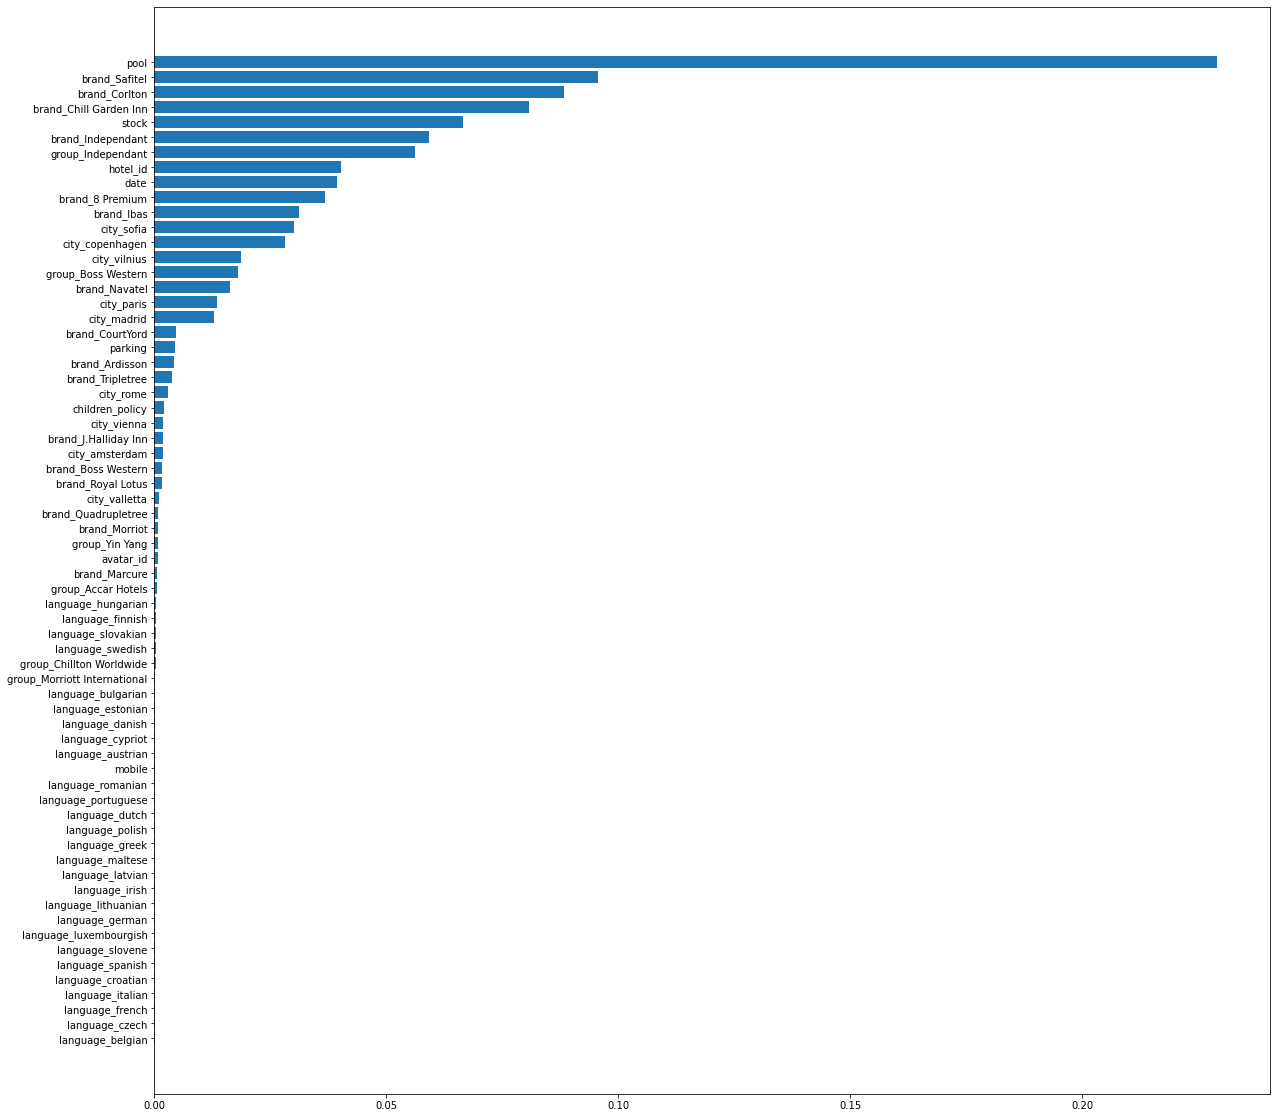

In [ ]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_dummies.columns)[indices])

In [ ]:
dff.to_csv("seryana_submission.csv",index=False)

# 2ème ITERATION 

In [ ]:
import random
list_city = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna' , 'vilnius']
list_language = [ 'austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch', 'estonian', 'finnish', 'french', 'german', 'greek',
                 'hungarian', 'irish', 'italian', 'latvian',
                 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian', 'slovakian', 'slovene', 'spanish' , 'swedish']
list_date_ordonnee=[35,22,18,10,4,3,1]
list_avatar=[]
list_requests=[]
c=721
for i in range(5):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  avatar = 'seryana-'+str(c)
  requests.post(path(f"avatars/{user_id}/{avatar}"))
  list_avatar.append(avatar)
  for i in range(len(list_city)):
    for j in range(len(list_date_ordonnee)):
      params= {
        "avatar_name": avatar,
        "language": random.choice(list_language),
        "city": list_city[i],
        "date": list_date_ordonnee[j],
        "mobile": random.randint(0,1),
      }
      list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
  c = c + 1 

In [ ]:
compteur = 0
for r in list_requests :
  if r.status_code==200:
    compteur += 1
print(compteur)

74


In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
  if r.status_code==200:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,10,151,26,amsterdam,22,romanian,0,131755
1,806,266,58,amsterdam,22,romanian,0,131755
2,214,183,35,amsterdam,22,romanian,0,131755
3,604,110,19,amsterdam,22,romanian,0,131755
4,101,270,42,amsterdam,22,romanian,0,131755


In [ ]:
pricing_requests

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,10,151,26,amsterdam,22,romanian,0,131755
1,806,266,58,amsterdam,22,romanian,0,131755
2,214,183,35,amsterdam,22,romanian,0,131755
3,604,110,19,amsterdam,22,romanian,0,131755
4,101,270,42,amsterdam,22,romanian,0,131755
...,...,...,...,...,...,...,...,...
88,794,334,1,vilnius,1,french,1,171710
89,355,87,0,vilnius,1,french,1,171710
90,593,55,9,vilnius,1,french,1,171710
91,221,58,0,vilnius,1,french,1,171710


In [ ]:
pricing_requests.to_csv("dataset_v2_1.csv")

--------------------------------------------------------------------------------

In [ ]:
import random
list_city = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna' , 'vilnius']
list_language = ['austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch', 'estonian', 'finnish', 'french', 'german', 'greek',
                 'hungarian', 'irish', 'italian', 'latvian',
                 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian', 'slovakian', 'slovene', 'spanish' , 'swedish']
list_date_ordonnee=[35,22,18,10,4,3,1]
list_avatar=[]
list_requests=[]
c=0
for i in range(10):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  avatar = 'twix-'+str(c)
  requests.post(path(f"avatars/{user_id}/{avatar}"))
  list_avatar.append(avatar)
  for i in range(len(list_city)):
    for u in range(len(list_language)):
      for j in range(len(list_date_ordonnee)):
        params= {
          "avatar_name": avatar,
          "language": list_language[u],
          "city": list_city[i],
          "date": list_date_ordonnee[j],
          "mobile": random.randint(0,1),
        }
        list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
  c = c + 1 

KeyboardInterrupt: ignored

In [ ]:
#len(list_requests)
compteur = 0
for r in list_requests :
  if r.status_code==200:
    compteur += 1
print(compteur)

926


In [ ]:
#list_requests

In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
  if r.status_code==200:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,140,107,62,amsterdam,35,austrian,1,171711
1,52,157,74,amsterdam,35,austrian,1,171711
2,146,175,106,amsterdam,35,austrian,1,171711
3,878,105,92,amsterdam,35,austrian,1,171711
4,12,80,30,amsterdam,35,austrian,1,171711


In [ ]:
len(pricing_requests)

97283

In [ ]:
pricing_requests.to_csv("dataset_v2_2.csv")

# TEST PR YASMINE

In [ ]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

Saving df_complete.csv to df_complete.csv
Saving features_hotels.csv to features_hotels.csv
Saving sample_submission.csv to sample_submission.csv
Saving test_set.csv to test_set.csv


In [ ]:
hotels = pd.read_csv(io.BytesIO(uploaded['features_hotels.csv']), index_col=['hotel_id', 'city'])
sample = pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
test_set = pd.read_csv(io.BytesIO(uploaded['test_set.csv']))
df_yasmine = pd.read_csv(io.BytesIO(uploaded['df_complete.csv']))

In [ ]:
df_yasmine.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,151,241,70,rome,22,latvian,0,90844
1,1,38,100,15,rome,22,latvian,0,90844
2,2,129,106,22,rome,22,latvian,0,90844
3,3,344,72,19,rome,22,latvian,0,90844
4,4,180,75,10,rome,22,latvian,0,90844


In [ ]:
df_final_yas
mine = df_yasmine.join(hotels, on=['hotel_id', 'city'])
df_final_yasmine.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,0,151,241,70,rome,22,latvian,0,90844,Accar Hotels,Safitel,1,1,0
1,1,38,100,15,rome,22,latvian,0,90844,Independant,Independant,1,0,0
2,2,129,106,22,rome,22,latvian,0,90844,Boss Western,Boss Western,0,0,0
3,3,344,72,19,rome,22,latvian,0,90844,Accar Hotels,Ibas,1,0,0
4,4,180,75,10,rome,22,latvian,0,90844,Accar Hotels,Ibas,1,0,0


In [ ]:
test_set_joined = test_set.join(hotels, on=['hotel_id', 'city'])
test_set_joined.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock,group,brand,parking,pool,children_policy
0,0,1,vilnius,21,romanian,0,1,161,46,Boss Western,J.Halliday Inn,1,0,0
1,1,1,vilnius,21,romanian,0,1,187,32,Accar Hotels,Marcure,1,1,0
2,2,1,vilnius,21,romanian,0,1,279,12,Independant,Independant,1,0,0
3,3,1,vilnius,21,romanian,0,1,395,10,Accar Hotels,Ibas,0,0,0
4,4,1,vilnius,21,romanian,0,1,488,42,Accar Hotels,Safitel,1,1,1


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
y_yasmine = df_final_yasmine['price']
X_yasmine = df_final_yasmine.drop(['Unnamed: 0','price'], axis=1)
rf = RandomForestRegressor()
X_test = test_set_joined[['hotel_id','stock','city','date','language','mobile', 'avatar_id','group','brand','parking','pool','children_policy']]
X_dummies_yasmine = pd.get_dummies(X_yasmine)
rf.fit(X_dummies_yasmine,y_yasmine)

RandomForestRegressor()

In [ ]:
X_test_dummies = pd.get_dummies(X_test)
y_pred_yasmine = rf.predict(X_test_dummies)
y_pred_yasmine = pd.Series(y_pred_yasmine)

In [ ]:
index = test_set_joined['index']
df_submission_yasmine = pd.concat([index,y_pred_yasmine], axis=1)
df_submission_yasmine.columns = ['index' , 'price']
df_submission_yasmine.head()

,index,price
0,0,110.62
1,1,140.38
2,2,66.65
3,3,51.98
4,4,194.90


In [ ]:
df_submission_yasmine.to_csv("submission_yasmine_v2.csv",index=False)

# build data





In [ ]:
import random
list_city = ['amsterdam', 'copenhagen', 'madrid', 'paris', 'rome', 'sofia', 'valletta', 'vienna' , 'vilnius']
list_language = [ 'austrian', 'belgian', 'bulgarian', 'croatian', 'cypriot', 'czech', 'danish', 'dutch', 'estonian', 'finnish', 'french', 'german', 'greek',
                 'hungarian', 'irish', 'italian', 'latvian',
                 'lithuanian', 'luxembourgish', 'maltese', 'polish', 'portuguese', 'romanian', 'slovakian', 'slovene', 'spanish' , 'swedish']
list_date=[1,5,7,10,15,20,25,30,60,45,2,100,180,12]
list_avatar=[]
list_requests=[]
c=0
for i in range(300):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  avatar = 'yanaser-'+str(c)
  requests.post(path(f"avatars/{user_id}/{avatar}"))
  list_avatar.append(avatar)
  params= {
    "avatar_name": avatar,
    "language": random.choice(list_language),
    "city": random.choice(list_city),
    "date": random.choice(list_date),
    "mobile": random.randint(0,1),
  }
  list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
  c = c + 1 

In [ ]:
import random
list_city = ['paris','madrid','rome', 'vienna','amsterdam']
list_language = ['belgian', 'french', 'spanish','italian','dutch','german',
                'portuguese']
list_date_ordonnee=[180,120,60,30,15,7,5,2]
list_avatar=[]
list_requests=[]
c=301
for i in range(1):
  #création de l'avatar et stock dans une liste
  #print(random.choice(list_city))
  
  for i in range(len(list_city)):
    for u in range(len(list_language)):
      avatar = 'yanaser'+str(c)
      requests.post(path(f"avatars/{user_id}/{avatar}"))
      list_avatar.append(avatar)
      for j in range(len(list_date_ordonnee)):
        params= {
          "avatar_name": avatar,
          "language": list_language[u],
          "city": list_city[i],
          "date": list_date_ordonnee[j],
          "mobile": random.randint(0,1),
        }
        list_requests.append(requests.get(path(f"pricing/{user_id}"), params=params))
      c = c + 1 

In [ ]:
import pandas as pd
pricing_requests = []
for r in list_requests:
  if r.status_code==200:
    pricing_requests.append(
        pd.DataFrame(r.json()['prices']).assign(**r.json()['request'])
    )

pricing_requests = pd.concat(pricing_requests)
pricing_requests.head()

,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,323,236,280,paris,180,belgian,1,280596
1,338,171,197,paris,180,belgian,1,280596
2,148,100,112,paris,180,belgian,1,280596
3,192,104,55,paris,180,belgian,1,280596
4,216,168,195,paris,180,belgian,1,280596


In [ ]:
pricing_requests.to_csv("yanaser_2.csv")

In [ ]:
import pandas as pd
df1 = pd.read_csv('dataset_1.csv')
df2 = pd.read_csv('dataset_2.csv')
df3 = pd.read_csv('dataset_3.csv')
df4 = pd.read_csv('dataset_4.csv')
df5 = pd.read_csv('dataset_5.csv')
df6 = pd.read_csv('dataset_6.csv')
df1000_1 = pd.read_csv('dataset_1000_1.csv')
df1000_2 = pd.read_csv('dataset_1000_2.csv')
df1000_3 = pd.read_csv('dataset_1000_3.csv')
dfv2_1 = pd.read_csv('dataset_v2_1.csv')
dfv2_2 = pd.read_csv('dataset_v2_2.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df1000_1,df1000_2,df1000_3,dfv2_1,dfv2_2])


In [ ]:
df.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,967,83,0,amsterdam,5,austrian,1,125454
1,1,588,184,0,amsterdam,5,austrian,1,125454
2,2,317,214,6,amsterdam,5,austrian,1,125454
3,3,387,439,5,amsterdam,5,austrian,1,125454
4,4,660,182,1,amsterdam,5,austrian,1,125454


In [ ]:
df.to_csv("df_seryana.csv")

In [ ]:
df.head()

,Unnamed: 0,hotel_id,price,stock,city,date,language,mobile,avatar_id
0,0,967,83,0,amsterdam,5,austrian,1,125454
1,1,588,184,0,amsterdam,5,austrian,1,125454
2,2,317,214,6,amsterdam,5,austrian,1,125454
3,3,387,439,5,amsterdam,5,austrian,1,125454
4,4,660,182,1,amsterdam,5,austrian,1,125454
